# Mille parole

Useful links:
- https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe
- https://www.w3schools.com/python/python_regex.asp
- https://stackoverflow.com/questions/20025882/add-a-string-prefix-to-each-value-in-a-string-column-using-pandas
- https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
This function:
- reads the csv file with sorted words;
- does some data cleaning (remove _ADP, _VERB, _CONJ, ...);
- take only words longer than a certain number of characters;
- adds a column with cumulative sum.
'''
def sort_words(filename):
    df = pd.read_csv(filename, delimiter='\t')
    # Some data cleaning
    # Remove cathegorization _ADP, _VERB, _CONJ etc.
    # I.e., merge differet parts of speech into a single word.
    df['word'] = df['word'].str.replace('_[A-Z]+$','', regex=True)
    # Take only words longer than a certain threshold.
    df = df[df['word'].str.len()>3]
    # Group and sort.
    df = df.groupby('word').sum()
    df.sort_values(by=['count'], ascending=False, inplace=True)
    df.reset_index(inplace=True)
    # Cumulative sum.
    df['cumsum'] = df['count'].cumsum()
    sum_all = df['count'].sum()
    df['cumsum_percent'] = df['cumsum']/sum_all*100
    return df

In [3]:
df_eng = sort_words('eng_from_1950.csv')
df_ita = sort_words('ita_from_1950.csv')
df_fre = sort_words('fre_from_1950.csv')

In [25]:
df_fre

,word,count,cumsum,cumsum_percent
0,dans,628357130,628357130,1.511432
1,pour,436645364,1065002494,2.561726
2,plus,331683580,1396686074,3.359548
3,sont,225717080,1622403154,3.902481
4,avec,202953082,1825356236,4.390659
...,...,...,...,...
348185,CEPMMT,1001,41573626892,99.999990
348186,reicher,1001,41573627893,99.999993
348187,bucranes,1001,41573628894,99.999995
348188,lupa,1001,41573629895,99.999998


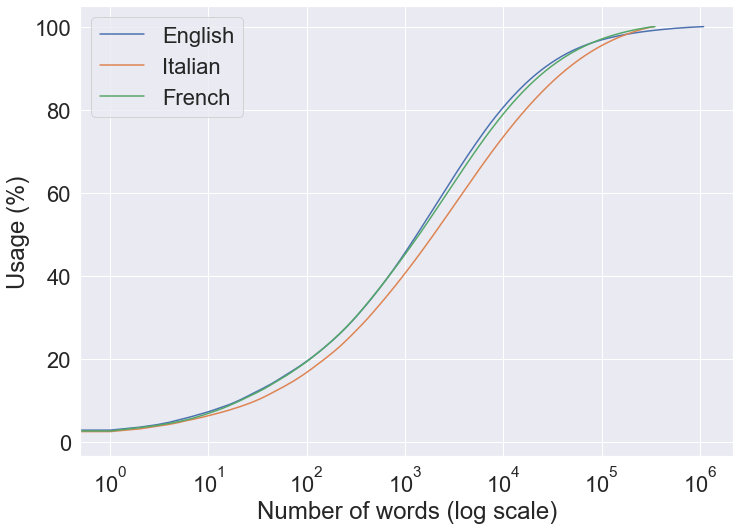

In [21]:
# Plot all datasets.

#sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale = 2)
#df_ita.plot(y='cumsum_percent', use_index=True, logx=True, xlabel = 'Number of words (log scale)', \
#        ylabel='Usage (%)', legend=True, label='Italian')
plt.plot(df_eng['cumsum_percent'], label='English')
plt.plot(df_ita['cumsum_percent'], label='Italian')
plt.plot(df_fre['cumsum_percent'], label='French')

plt.xscale('log')
plt.xlabel('Number of words (log scale)')
plt.ylabel('Usage (%)')
plt.legend()
# Alternative approach to change font size in Seaborn: https://www.delftstack.com/howto/seaborn/seaborn-font-size/

plt.savefig('plot.png', bbox_inches='tight', dpi=300) 

In [26]:
def save_file(df, n_head, language):
    # Save file for the purpose of the *.md file. '##' is for the *.md file formatting.
    # df_tofile = '##' + df.head(n_head)['word'].astype(str)
    df.head(n_head).to_csv(f'top_{n_head}_words_{language}.csv')

In [27]:
save_file(df_eng, 1000, 'eng')
save_file(df_ita, 1000, 'ita')
save_file(df_fre, 1000, 'fre')

In [17]:
df_ita[df_ita['cumsum_percent']>=40]

,word,count,cumsum,cumsum_percent
960,rischio,3734284,10798747903,40.012528
961,realizzazione,3727756,10802475659,40.026340
962,procedimento,3724234,10806199893,40.040140
963,fascismo,3723855,10809923748,40.053938
964,situazioni,3715511,10813639259,40.067705
...,...,...,...,...
338279,ussiti,1001,26988412975,99.999985
338280,reggicortina,1001,26988413976,99.999989
338281,Sohnes,1001,26988414977,99.999993
338282,posteggiato,1001,26988415978,99.999996


English: **688** words are used 40% of time, **1089392** words in total.

French: **691** words are used 40% of time, **348189** words in total.

Italian: **960** words are used 40% of time, **338283** words in total.